In [1]:
import json
import random
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:


# Open the JSON file and load its contents into a dictionary
with open('games.json', 'r') as f:
    games_dict = json.load(f)
    

# Print the dictionary to verify that it was loaded correctly
print(games_dict)

{'Action Game': ['Grand Theft Auto V', 'Call of Duty: Modern Warfare', "Assassin's Creed Valhalla", 'Doom Eternal', 'Metal Gear Solid V: The Phantom Pain', 'Hades', 'Control', 'Nier: Automata', 'Batman: Arkham Knight', 'Devil May Cry 5', 'Resident Evil Village', 'Deathloop', 'Far Cry 6', "Ghost of Tsushima Director's Cut", 'Returnal'], 'Adventure Game': ['The Legend of Zelda: Breath of the Wild', "Uncharted 4: A Thief's End", 'Red Dead Redemption 2', 'The Last of Us Part II', 'Death Stranding', 'Horizon Zero Dawn', "Assassin's Creed Odyssey", 'God of War', 'Tomb Raider', 'Shadow of the Colossus', 'It Takes Two', 'Kena: Bridge of Spirits', 'Life is Strange: True Colors', 'Psychonauts 2', 'The Artful Escape'], 'Role-Playing Game': ['The Witcher 3: Wild Hunt', 'Skyrim', 'Fallout 4', 'Mass Effect 2', 'Final Fantasy VII Remake', 'Persona 5', 'Dragon Age: Inquisition', 'Divinity: Original Sin II', 'Dark Souls III', 'Kingdom Come: Deliverance', 'Tales of Arise', 'Scarlet Nexus', 'Disco Elysiu

In [19]:
x='Action Game'
games_dict[x]

['Grand Theft Auto V',
 'Call of Duty: Modern Warfare',
 "Assassin's Creed Valhalla",
 'Doom Eternal',
 'Metal Gear Solid V: The Phantom Pain',
 'Hades',
 'Control',
 'Nier: Automata',
 'Batman: Arkham Knight',
 'Devil May Cry 5',
 'Resident Evil Village',
 'Deathloop',
 'Far Cry 6',
 "Ghost of Tsushima Director's Cut",
 'Returnal']

In [3]:

def create_transaction_data(num_transactions, max_games_per_transaction,mode):
    data = []

    game_names = [
        'Action Game', 'Adventure Game', 'Role-Playing Game', 'Strategy Game',
        'Simulation Game', 'Sports Game', 'Puzzle Game', 'Racing Game',
        'Shooter Game', 'Platformer Game', 'Indie Game', 'Horror Game'
    ]

    for transaction_id in range(1, num_transactions + 1):
        if max_games_per_transaction <= 2:
            max_games_per_transaction = 2
        num_games = random.randint(2, max_games_per_transaction)
        games = random.sample(game_names, num_games)
        amount = round(random.uniform(10, 100), 2)
        purchase_date = f'2023-09-{random.randint(1, 30)}'
        discount = round(random.uniform(0, 0.3), 2)
        mpay=random.choice(['cash','card','robbery','UPI','Membership'])


        transaction = {
            'TransactionID': transaction_id,
            'Games': games,
            'Amount': amount,
            'PurchaseDate': purchase_date,
            'Discount': discount,
            'Payment_mode': mpay
            
        }

        data.append(transaction)

    
    if mode==1:
        return data
    else:
        # Convert the data list to JSON format
        json_data = json.dumps(data, indent=4)

        # Save the JSON data to a file
        with open('transaction_data.json', 'w') as json_file:
            json_file.write(json_data)
        return json_data

# Example usage:
# transaction_data = create_transaction_data(10, 5)
# print(transaction_data)

In [6]:

try:

    num_transactions = 1000 #int(input("Enter the number of transactions: "))
    max_games_per_transaction = 12#int(input("Enter the maximum number of games per transaction: "))
    user_game = input("Enter a video game: ")
    if user_game=='1':
        user_game='Action Game'
    num_recommendations = int(input("Enter the number of game recommendations: "))


    transaction_data = create_transaction_data(num_transactions, max_games_per_transaction,1)


    df = pd.DataFrame(transaction_data)

    oht = pd.get_dummies(df['Games'].apply(pd.Series).stack()).groupby(level=0).sum()



    frequent_itemsets = apriori(oht, min_support=0.35, use_colnames=True)

    rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)


    user_rules = rules[rules['antecedents'] == {user_game}]
    user_rules = user_rules.sort_values(by='lift', ascending=False).head(num_recommendations)


    # recommended_games = list(user_rules['consequents'].values)

    
    recommended_games = [list(game)[0] for game in user_rules['consequents']]
    print(f"Recommended games for {user_game}: {recommended_games[0]}")
    
except Exception as e:
    print(f"An error occurred: {str(e)}")

Recommended games for Action Game: Simulation Game


c:\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [37]:
num_transactions = 1000 #int(input("Enter the number of transactions: "))
max_games_per_transaction = 12#int(input("Enter the maximum number of games per transaction: "))
user_game = '1' #input("Enter a video game: ")
if user_game=='1':
    user_game='Action Game'
num_recommendations = 2 #int(input("Enter the number of game recommendations: "))
transaction_data = create_transaction_data(num_transactions, max_games_per_transaction,1)

Random number: 0.24


In [72]:
def porty(transaction_data):
    try:
        df = pd.DataFrame(transaction_data)

        oht = pd.get_dummies(df['Games'].apply(pd.Series).stack()).groupby(level=0).sum()
        random_number = random.uniform(0.20, 0.30)
        msc=round(random_number,2)



        frequent_itemsets = apriori(oht, min_support=msc, use_colnames=True)

        rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)


        user_rules = rules[rules['antecedents'] == {user_game}]
        user_rules = user_rules.sort_values(by='lift', ascending=False).head(num_recommendations)


        # recommended_games = list(user_rules['consequents'].values)

        
        recommended_games = [list(game)[0] for game in user_rules['consequents']]
        # print(f"Recommended games for {user_game}: {recommended_games[0]}")
        return recommended_games
        
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")

porty(transaction_data)

['Role-Playing Game', 'Puzzle Game']

In [77]:
import warnings

# Ignore the DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

narr=[]
for i in range(10):
    tlis=porty(transaction_data)
    narr=narr+tlis
narr

['Platformer Game',
 'Horror Game',
 'Role-Playing Game',
 'Puzzle Game',
 'Role-Playing Game',
 'Racing Game',
 'Role-Playing Game',
 'Puzzle Game',
 'Role-Playing Game',
 'Racing Game',
 'Role-Playing Game',
 'Racing Game',
 'Role-Playing Game',
 'Puzzle Game',
 'Role-Playing Game',
 'Puzzle Game',
 'Role-Playing Game',
 'Puzzle Game',
 'Role-Playing Game',
 'Racing Game']

In [78]:
import warnings

# Ignore the DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

narr=[]
for i in range(1000):
    tlis=porty(transaction_data)
    narr=narr+tlis

In [95]:
def fretab(input_array):

    frequency_table = {}

    for item in input_array:
        if item in frequency_table:
            frequency_table[item] += 1
        else:
            frequency_table[item] = 1

    return frequency_table

# Example usage:
my_array = narr
result = fretab(my_array)

# Print the frequency table
ci=1
for item, count in result.items():
    
    print(f'{ci} {item}: {count}')
    ci=ci+1

1 Role-Playing Game: 865
2 Racing Game: 217
3 Puzzle Game: 639
4 Adventure Game: 96
5 Platformer Game: 39
6 Horror Game: 39
7 Indie Game: 105


In [96]:
result

{'Role-Playing Game': 865,
 'Racing Game': 217,
 'Puzzle Game': 639,
 'Adventure Game': 96,
 'Platformer Game': 39,
 'Horror Game': 39,
 'Indie Game': 105}

In [91]:
result.values()

dict_values([865, 217, 639, 96, 39, 39, 105])

In [85]:
nlis=[
        'Action Game', 'Adventure Game', 'Role-Playing Game', 'Strategy Game',
        'Simulation Game', 'Sports Game', 'Puzzle Game', 'Racing Game',
        'Shooter Game', 'Platformer Game', 'Indie Game', 'Horror Game'
    ]
len(nlis)

12

In [97]:
for i in nlis:
    if i not in result.keys():
        result[i]=0

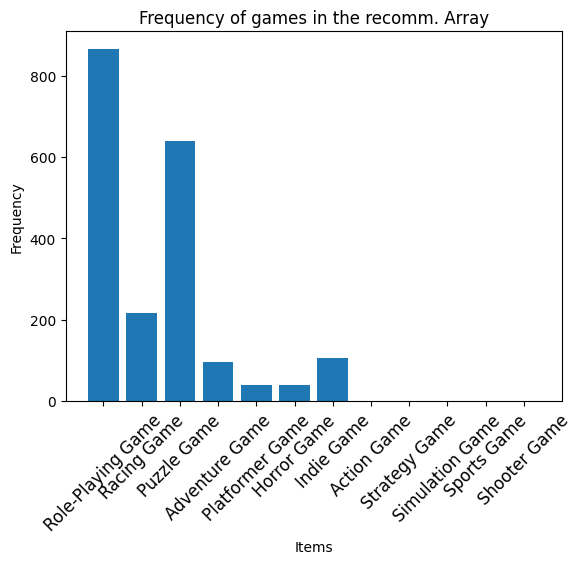

In [98]:
import matplotlib.pyplot as plt

items = list(result.keys())
counts = list(result.values())

# Create a bar chart
plt.bar(items, counts)
plt.xticks(rotation=45, fontsize=12) 
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Frequency of games in the recomm. Array')
plt.show()